In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
# Read in the data 

df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv',index_col = 'Id')

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Problem Statement

Predict the sales price for each house. Using supervised ML as we want to predict a range of values.

Exploratory Data Analysis

First thing is to determine what features are most relevant. Use domain knowledge to pick out which ones you think will be good.

1. LotArea
2. YearBuilt
3. FullBath
4. Bedroom


In [6]:
X = df[['LotArea','YearBuilt','FullBath','BedroomAbvGr','GarageArea','GrLivArea','PoolArea']]
y = df['SalePrice']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [11]:
print(mse)

2029954022.2442076


In [12]:
print(r2)

0.7353497142869709


These are my scores based on a Linear Regression model and 4 input features. Not great. Could probably improve the score by adding more features but how many should we add. 

I think first we have to do some feature engineering.

1. Start off with normalizing the input features.

In [13]:
# Normalizing the features
LotAreaMean = df['LotArea'].mean()
LotAreaStd = df['LotArea'].std()
LotAreaZ_scores = (df['LotArea'] - LotAreaMean) / LotAreaStd

In [14]:
LotAreaZ_scores

Id
1      -0.207071
2      -0.091855
3       0.073455
4      -0.096864
5       0.375020
          ...   
1456   -0.260471
1457    0.266316
1458   -0.147760
1459   -0.080133
1460   -0.058092
Name: LotArea, Length: 1460, dtype: float64

Easier way to scale/normalize the data

In [15]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Peak to Peak range by column in Raw    X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized    X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw    X:LotArea         213945
YearBuilt          138
FullBath             3
BedroomAbvGr         8
GarageArea        1418
GrLivArea         5308
PoolArea           738
dtype: int64
Peak to Peak range by column in Normalized    X:[19.89305327  4.50063201  5.48768887  9.94393737  6.7202203  10.12574895
 17.72731468]


In [16]:
sgdr = SGDRegressor(max_iter= 1000)
sgdr.fit(X_norm,y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 25, number of weight updates: 29201.0


In [17]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [  6053.48535972  23775.2867413    -333.12272164 -10912.21944869
  13365.37453253  47146.25299216  -1348.2901147 ], b:[181379.53580322]


In [18]:
## Make predictions

y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm,w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:6]}" )
print(f"Prediction on training set:\n{y_pred_sgd[:6]}" )
print(f"Target values \n{y_train[:6]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[137484.3519803  193033.58615025  49606.71765515 158712.54266972
 144166.80397534 128471.34599947]
Prediction on training set:
[137484.3519803  193033.58615025  49606.71765515 158712.54266972
 144166.80397534 128471.34599947]
Target values 
Id
255     145000
1067    178000
639      85000
800     175000
381     127000
304     149900
Name: SalePrice, dtype: int64


In [19]:
y_pred_sgd = sgdr.predict(X_test_scaled)
print(y_pred[:6])
print(y_train[:6])

[137484.3519803  193033.58615025  49606.71765515 158712.54266972
 144166.80397534 128471.34599947]
Id
255     145000
1067    178000
639      85000
800     175000
381     127000
304     149900
Name: SalePrice, dtype: int64


In [20]:
mse_sgd = mean_squared_error(y_test,y_pred_sgd)
rmse_test = np.sqrt(mse_sgd)
r2_sgd = r2_score(y_test,y_pred_sgd)
print(mse_sgd)
print(rmse_test)
print(r2_sgd)

2052906533.0569925
45309.011609800014
0.7323573368843934


Get similar MSE and R2 score for both LinearRegression and SGDRegressor. They are both for linear regression but are based on different algorithms. LinearRegression is based on OLS and SGDRegressor is based on Stochastic Gradient Descent.

To improve score:
1. Add more features
2. Create polynomial features (add regularization to prevent overfitting)
3. Use GridSearch for Hyperparameter tuning

Using more features (numerical ones).

In [21]:
def isolate_numerical_features(df):
  """
  Isolates numerical features from a pandas DataFrame.

  Args:
    df: The input pandas DataFrame.

  Returns:
    A pandas DataFrame containing only the numerical features.
  """
  numerical_features = df.select_dtypes(include=['number'])
  return numerical_features

In [22]:
df_numerical  = isolate_numerical_features(df)
df_numerical.shape

(1460, 37)

Plotting correlation heatmap for the 37 numerical features

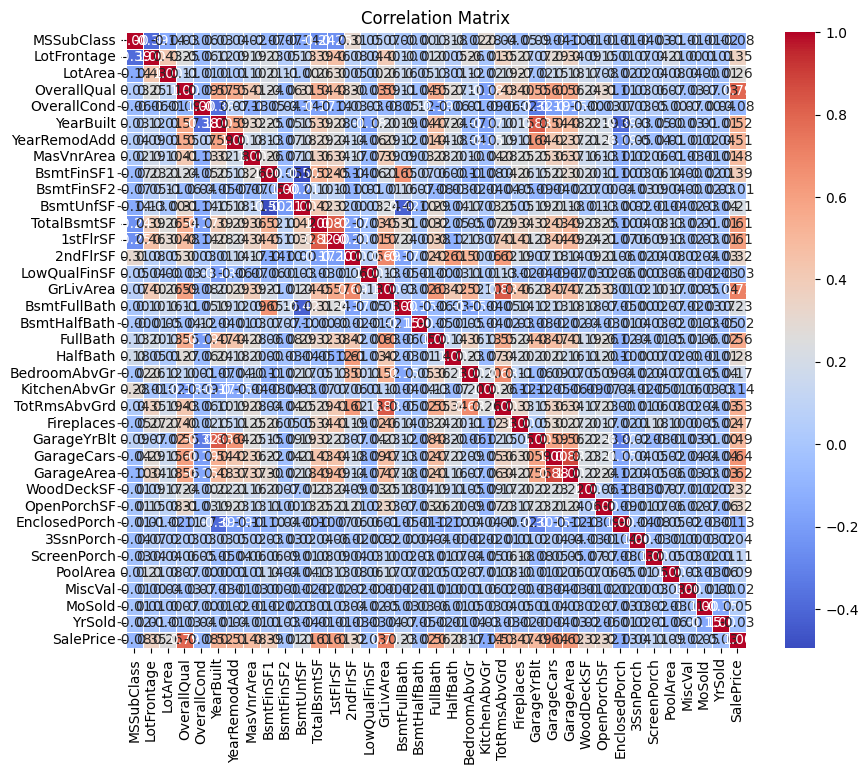

In [23]:
corr_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [24]:
 def find_most_correlated_features(df, target_col, num_features=10):
      """Finds the most correlated features with the target variable."""
      corr_with_target = df.corr()[target_col].abs().sort_values(ascending=False)
      most_correlated = corr_with_target.drop(target_col).head(num_features)
      return most_correlated


In [25]:
find_most_correlated_features(df_numerical,'SalePrice',num_features=15)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64

In [26]:
X = df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage']]
y = df['SalePrice']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

LinearRegression doesn't accept NaN values or null values. To solve this can remove the rows with null values in any of the features. 

How do I handle NaN values?

In [28]:
df_numerical.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [29]:
## Dropping the rows with NaNs and nulls.

df_numerical = df_numerical.dropna()

In [30]:
X = df_numerical[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage']]
y = df_numerical['SalePrice']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)


In [32]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = LinearRegression()
model.fit(X_norm,y_train)

LinearRegression()

In [34]:
yhat = model.predict(X_norm)

In [35]:
mse = mean_squared_error(y_train, yhat) /2

In [36]:
mse

725566096.7378346